In [1]:
import pandas as pd
data = pd.read_csv('Toyota-Corolla.csv')
data.head(6)

,Price,Age,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,...,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model
0,13500,23,46986,Diesel,90,1,0,2000,3,0,...,1,0,0,1,0,1,1,1,0,0
1,13750,23,72937,Diesel,90,1,0,2000,3,0,...,1,1,0,1,1,1,0,1,0,0
2,13950,24,41711,Diesel,90,1,0,2000,3,1,...,1,0,0,1,0,0,0,1,0,0
3,14950,26,48000,Diesel,90,0,0,2000,3,1,...,1,0,0,1,0,0,0,1,0,0
4,13750,30,38500,Diesel,90,0,0,2000,3,1,...,1,1,0,1,0,1,1,1,1,0
5,12950,32,61000,Diesel,90,0,0,2000,3,0,...,1,1,0,1,0,1,1,1,1,0


In [2]:
N, p = data.shape
print("The number of sampels are {}".format(N))
print("Dataframe contains {} features".format(p))

The number of sampels are 1436
Dataframe contains 21 features


In [3]:
data.isnull().sum()

Price               0
Age                 0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Mfr_Guarantee       0
Guarantee_Period    0
ABS                 0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Mistlamps           0
Sport_Model         0
dtype: int64

In [4]:
data['Doors'].value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

In [5]:
data['Fuel_Type'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [6]:
data_g = data.groupby(['Fuel_Type'])

In [7]:
print(data_g['Price'].mean())
print("Diesel is the most expensive one")

Fuel_Type
CNG        9421.176471
Diesel    11294.554839
Petrol    10679.310127
Name: Price, dtype: float64
Diesel is the most expensive one


In [8]:
data_g_ABS = data.groupby(['ABS'])
print(data_g_ABS['Price'].mean())

ABS
0     8413.626866
1    11262.510274
Name: Price, dtype: float64


In [9]:
data_g_met = data.groupby(['Met_Color'])
print(data_g_met['Price'].mean())

Met_Color
0    10162.047109
1    11004.941176
Name: Price, dtype: float64


In [10]:
data_g_doors = data.groupby(['Doors'])
print(data_g_doors['Price'].mean())

Doors
2     8100.000000
3    10107.342444
4     9806.768116
5    11503.209199
Name: Price, dtype: float64


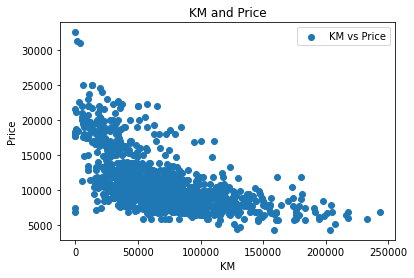

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data['KM'],data['Price'],label='KM vs Price')
ax.set_xlabel('KM')
ax.set_ylabel('Price')
ax.set_title('KM and Price')
ax.legend()
plt.show()

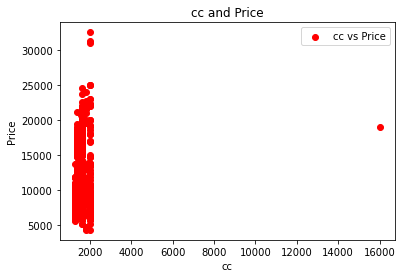

In [12]:
fig, ax = plt.subplots()
ax.scatter(data['cc'],data['Price'],label='cc vs Price',color='red')
ax.set_xlabel('cc')
ax.set_ylabel('Price')
ax.set_title('cc and Price')
ax.legend()
plt.show()

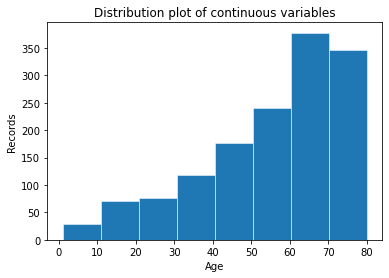

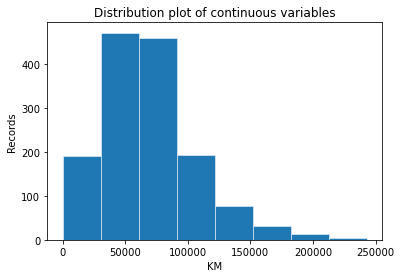

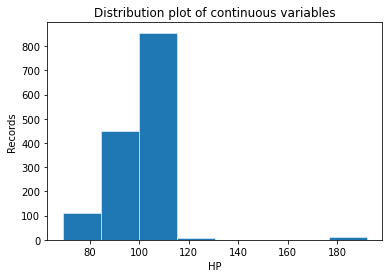

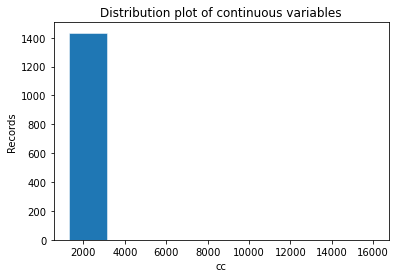

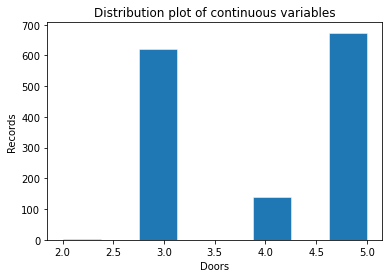

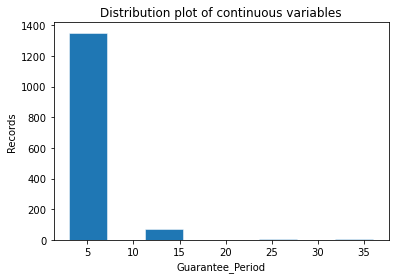

In [13]:
continuous_variables = ['Age', 'KM', 'HP', 'cc','Doors','Guarantee_Period']
for item in continuous_variables:
    fig, ax = plt.subplots()
    ax.hist(data[item], bins=8, linewidth=0.5, edgecolor="white")
    ax.set_xlabel(item)
    ax.set_ylabel('Records')
    ax.set_title('Distribution plot of continuous variables')
    plt.show()

NameError: name 'sns' is not defined

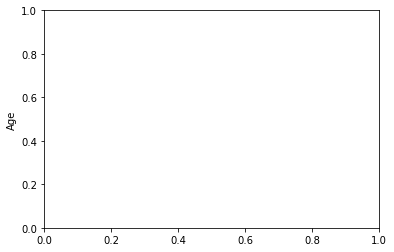

In [14]:
for item in continuous_variables:
    plt.figure()
    plt.ylabel(item)
    sns.boxplot(x=data[item])
    plt.show()

In [15]:
dummies = pd.get_dummies(data['Fuel_Type'])
merge = pd.concat([data,dummies],axis=1)
new_data = merge.drop('Fuel_Type',axis=1)
new_data.head(10)

,Price,Age,KM,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,Guarantee_Period,...,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,CNG,Diesel,Petrol
0,13500,23,46986,90,1,0,2000,3,0,3,...,1,0,1,1,1,0,0,0,1,0
1,13750,23,72937,90,1,0,2000,3,0,3,...,1,1,1,0,1,0,0,0,1,0
2,13950,24,41711,90,1,0,2000,3,1,3,...,1,0,0,0,1,0,0,0,1,0
3,14950,26,48000,90,0,0,2000,3,1,3,...,1,0,0,0,1,0,0,0,1,0
4,13750,30,38500,90,0,0,2000,3,1,3,...,1,0,1,1,1,1,0,0,1,0
5,12950,32,61000,90,0,0,2000,3,0,3,...,1,0,1,1,1,1,0,0,1,0
6,16900,27,94612,90,1,0,2000,3,0,3,...,1,0,1,1,1,0,1,0,1,0
7,18600,30,75889,90,1,0,2000,3,1,3,...,1,1,1,1,1,0,0,0,1,0
8,21500,27,19700,192,0,0,1800,3,0,3,...,0,0,1,1,1,0,0,0,0,1
9,12950,23,71138,69,0,0,1900,3,0,3,...,1,0,0,0,1,0,0,0,1,0


In [16]:
y = new_data.pop('Price')
X = new_data.copy()
print(X.shape)
print(y.shape)

(1436, 22)
(1436,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 22)
(359, 22)
(1077,)
(359,)


In [20]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(normalize= True)
lr_model.fit(X_train,y_train)

/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [21]:
y_hat_test = lr_model.predict(X_test)
print(lr_model.score(X_train,y_train))
sum(y_test != y_hat_test)

0.8763963441982683


359

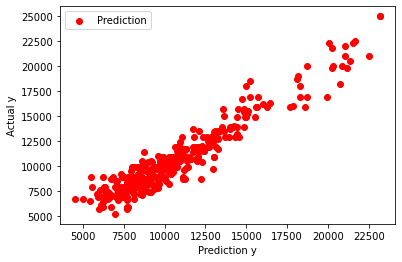

In [22]:
fig,ax = plt.subplots()
ax.scatter(y_hat_test, y_test,color='red', label='Prediction')
ax.set_xlabel('Prediction y')
ax.set_ylabel('Actual y')
ax.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_hat_test)
r2 = r2_score(y_test,y_hat_test)
print("MSE={:.4f}".format(mse))
print("R-Squared={:.4f}".format(r2))

MSE=1191760.4011
R-Squared=0.9025


In [26]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [27]:
y_hat_test = classifier.predict(X_test)
print(classifier.score(X_train,y_train))
sum(y_test != y_hat_test)

0.9851439182915506


332

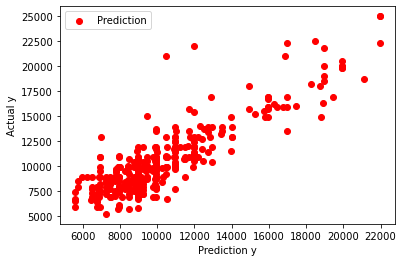

In [28]:
fig,ax = plt.subplots()
ax.scatter(y_hat_test, y_test,color='red', label='Prediction')
ax.set_xlabel('Prediction y')
ax.set_ylabel('Actual y')
ax.legend()
plt.show()

In [29]:
mse = mean_squared_error(y_test,y_hat_test)
r2 = r2_score(y_test,y_hat_test)
print("MSE={:.4f}".format(mse))
print("R-Squared={:.4f}".format(r2))

MSE=2912169.5070
R-Squared=0.7618


In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knn_model.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [37]:
y_hat_test = knn_model.predict(X_test)
print(knn_model.score(X_train,y_train))
sum(y_test != y_hat_test)

0.9109365715558767


356

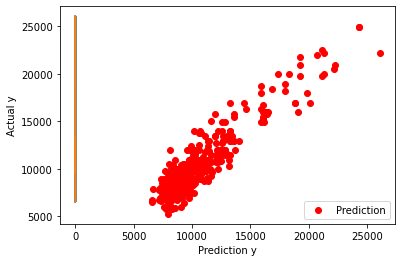

In [41]:
fig,ax = plt.subplots()
ax.scatter(y_hat_test, y_test,color='red', label='Prediction')
ax.set_xlabel('Prediction y')
ax.set_ylabel('Actual y')
ax.plot(X_test, y_hat_test)
ax.legend()
plt.show()

In [42]:
mse = mean_squared_error(y_test,y_hat_test)
r2 = r2_score(y_test,y_hat_test)
print("MSE={:.4f}".format(mse))
print("R-Squared={:.4f}".format(r2))

MSE=1890348.5509
R-Squared=0.8454
